#import the essential libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the dataset

In [ ]:
df=pd.read_csv("credit_risk_dataset.csv")

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.shape

(32581, 12)

#general info of the dataset 


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df1=df[df['person_emp_length']>30].index

#we drop a small no of data rows which are outliers(df1)


In [ ]:
df.drop(df1,inplace=True)

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#we plot a heatmap to check null value containing features


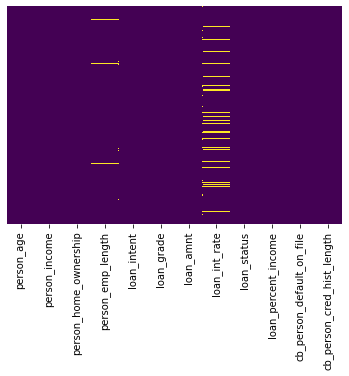

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df2=df[df['person_emp_length'].isnull()]

In [ ]:
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [ ]:
df3=df2.fillna({'person_emp_length':1})

In [ ]:
df3

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,1.0,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,1.0,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,1.0,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,1.0,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,1.0,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,1.0,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,1.0,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,1.0,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,1.0,MEDICAL,A,8575,7.51,0,0.26,N,18


#we draw countplot to check relation of employee length and home-ownership 


#we dont get much from the relationship


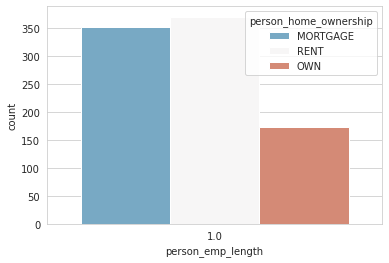

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='person_emp_length',data=df3,hue='person_home_ownership',palette='RdBu_r')

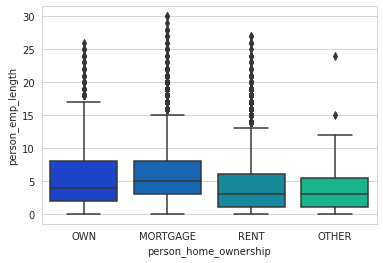

In [ ]:
sns.boxplot(x='person_home_ownership',y='person_emp_length',data=df,palette='winter')

#we define a function to fill the null emp length with median of the emp length of respective home ownership data


In [ ]:

def impute_emp_length(cols):
    emp_length=cols[0]
    home_ownership=cols[1]
    if pd.isnull(emp_length):
        if home_ownership=='OWN':
            return 4.0
        if home_ownership=='MORTGAGE':
            return 5.0
        if home_ownership=='RENT':
            return 3.0
        if home_ownership=='OTHER':
            return 3.0
        
    else:
         return emp_length
           
            

In [ ]:
df['person_emp_length']=df[['person_emp_length','person_home_ownership']].apply(impute_emp_length,axis=1)

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


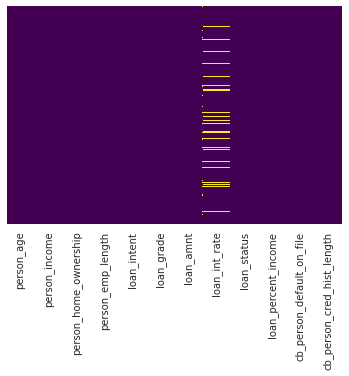

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

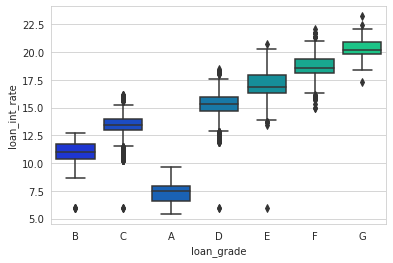

In [ ]:
sns.boxplot(x='loan_grade',y='loan_int_rate',data=df,palette='winter')

#we see a trend that interest rate offered is high for lower grade(in terms of credit rating) customers



#this is fairly common in banking world to charge higher rate for risky loans



In [ ]:
g=df.groupby('loan_grade')

In [ ]:
g.describe()['loan_int_rate']

,count,mean,std,min,25%,50%,75%,max
loan_grade,,,,,,,,
A,9772.0,7.327713,1.044059,5.42,6.62,7.490,7.90,9.63
B,9391.0,10.995906,0.909440,6.00,10.36,10.990,11.71,12.69
C,5828.0,13.463542,0.961883,6.00,12.98,13.480,13.99,16.11
D,3311.0,15.362045,1.111059,6.00,14.74,15.310,16.00,18.49
E,881.0,17.009455,1.323164,6.00,16.32,16.820,17.93,20.69
F,214.0,18.609159,1.375524,15.01,18.09,18.535,19.38,22.06
G,59.0,20.251525,1.066830,17.34,19.82,20.160,20.88,23.22


#function to fill null int rates with median or 50% interest rate of respective credit grade


In [ ]:

def impute_int_rate(cols):
    int_rate=cols[0]
    loan_grade=cols[1]
    if pd.isnull(int_rate):
        
        if loan_grade=='A':
            return 7.490
        
        if  loan_grade=='B':
            return 10.990
        
        if  loan_grade=='C':
            return 13.480
        
        if  loan_grade=='D':
            return 15.310
            
        if  loan_grade=='E':
            return 16.820
        
        if  loan_grade=='F':
            return 18.535
        
        if  loan_grade=='G':
            return 20.160
            
        
    else:
         return int_rate
           
            
        

In [ ]:
df['loan_int_rate']=df[['loan_int_rate','loan_grade']].apply(impute_int_rate,axis=1)

In [ ]:
df.drop(['loan_percent_income'],axis=1,inplace=True)

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,26


In [ ]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#we swap last two columns for ease of code and model application

In [ ]:
df=swap_columns(df,'cb_person_default_on_file','cb_person_cred_hist_length')

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,cb_person_default_on_file
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,2,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,3,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,2,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,4,Y
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,2,N
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,30,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,19,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,28,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,26,N


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X

array([[21, 9600, 'OWN', ..., 11.14, 0, 2],
       [25, 9600, 'MORTGAGE', ..., 12.87, 1, 3],
       [23, 65500, 'RENT', ..., 15.23, 1, 2],
       ...,
       [65, 76000, 'RENT', ..., 10.99, 1, 28],
       [56, 150000, 'MORTGAGE', ..., 11.48, 0, 26],
       [66, 42000, 'RENT', ..., 9.99, 0, 30]], dtype=object)

#we hot encode the categorical values of the columns that contain them



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 21, 9600, 5.0, 1000, 11.14, 0, 2], dtype=object)

#convert yes and no of the dependent variable into integers



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


#splitting of dataset for training and testing


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


#since our project deals with binary output or classification in other words we scale our data for different features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#applying various machine learning models starts from here


#  MODEL 1


In [ ]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#we predict and vertically stash the predicted and actual output 


In [ ]:
y_pred1=classifier.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#predict a new entry based on the model we employed


In [ ]:
print(classifier.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 25, 96000, 5.0, 30000, 14.14, 1, 5]])))

[0]


#confusion matrix and accuracy score to assess the efficiency of our trained model on the test dataset


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[4681  685]
 [ 420  729]]


0.8303914044512664

#   MODEL 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = classifier2.predict(X_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[4805  561]
 [ 565  584]]


0.827168073676132

#   MODEL 3

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred3=classifier3.predict(X_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[4511  855]
 [ 257  892]]


0.8293169608595549

#   MODEL 4


In [ ]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred4 = classifier4.predict(X_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[4771  595]
 [ 548  601]]


0.8245587106676899

#   MODEL 5


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred5 = classifier5.predict(X_test)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[4271 1095]
 [   1 1148]]


0.8317728319263239

#   MODEL 6

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred6 = classifier6.predict(X_test)
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[4804  562]
 [ 573  576]]


0.8257866462010744

#   MODEL 7


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier7.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred7 = classifier7.predict(X_test)
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred7)
print(cm)
accuracy_score(y_test, y_pred7)

[[4915  451]
 [ 659  490]]


0.829623944742901

#  WE PLOT ELBOW CURVE TO CHECK BEST NO OF CLUSTERS...




#THIS IS ONLY DONE AS A CODING TASK AS WE KNOW THAT WE HAVE TO TAKE ONLY 2 CLUSTERS IN THIS TASK AS OUTPUT IS BINARY



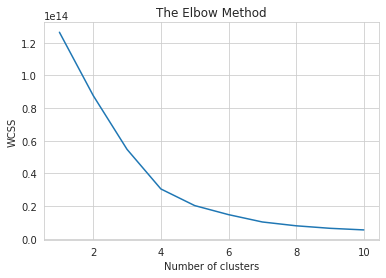

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#   MODEL 8


In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_kmeans)
print(cm)
accuracy_score(y, y_kmeans)

[[26777    52]
 [ 5726    17]]


0.8226083752916615

#  WE USE THE ARTIFICIAL NEURAL NETWORK AS WELL AS OUR  MODEL 9


In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

#  FIRST LAYER OR INPUT LAYER


In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#  MIDDLE OR HIDDEN LAYER


In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#OUTPUT OR SECOND LAYER


In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
815/815 [==============================] - 2s 2ms/step - loss: 0.3552 - accuracy: 0.7921
Epoch 2/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2452 - accuracy: 0.8256
Epoch 3/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2432 - accuracy: 0.8278
Epoch 4/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2427 - accuracy: 0.8312
Epoch 5/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2424 - accuracy: 0.8306
Epoch 6/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2421 - accuracy: 0.8314
Epoch 7/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.8317
Epoch 8/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.8305
Epoch 9/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.8321
Epoch 10/100
815/815 [==============================] - 1s 2ms/step - loss: 0.2415 - accura

In [ ]:
y_pred8 = ann.predict(X_test)
y_pred8 = (y_pred8 > 0.5)
print(np.concatenate((y_pred8.reshape(len(y_pred8),1), y_test.reshape(len(y_test),1)),1))

204/204 [==============================] - 0s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred8)
print(cm)
accuracy_score(y_test, y_pred8)

[[4825  541]
 [ 601  548]]


0.824712202609363

#  WE PERFORM PRINCIPAL COMPONENT ANALYSIS FOR LOGISTIC REGRESSION MODEL ON OUR DATA AS MODEL 10



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_ = LogisticRegression(random_state = 0)
classifier_.fit(X_train1, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_ = classifier_.predict(X_test1)
cm = confusion_matrix(y_test, y_pred_)
print(cm)
accuracy_score(y_test, y_pred_)

[[4871  495]
 [ 662  487]]


0.822409823484267

# WE CALCULATE THE CROSS VALIDATION SCORE FOR ONE OF THE MODELS AS WELL ...SIMILARLY IT CAN BE CALCULATED FOR OTHER MODELS


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier7, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.15 %
Standard Deviation: 0.65 %


In [ ]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#  MODEL 11 ...XGBOOST


In [ ]:
from xgboost import XGBClassifier
classifier9 = XGBClassifier()
classifier9.fit(X_train, y_train)

XGBClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred9 = classifier9.predict(X_test)
cm = confusion_matrix(y_test, y_pred9)
print(cm)
accuracy_score(y_test, y_pred9)

[[4807  559]
 [ 530  619]]


0.8328472755180353

#CROSS VALIDATION SCORE FOR XGBOOST ALGORITHM 



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier9, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 82.95 %
Standard Deviation: 0.55 %


#WE ALSO EMLOY ONE OF THE ENSEMBLE LEARNING TECHNIQUE AS WELL NAMELY BAGGING AND CALCULATE ITS  oob SCORE


In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=0)
bag_model.fit(X_train,y_train)
bag_model.oob_score_


0.8248455309513758

In [ ]:
y_pred11 = bag_model.predict(X_test)
print(np.concatenate((y_pred11.reshape(len(y_pred11),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
bag_model.score(X_test,y_test)

0.8317728319263239